### 簡単な画像認識 (Step.4) k-NN

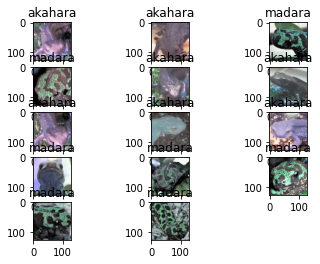

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob 

%matplotlib inline


paths = glob('../dataset/*')

for i,path in enumerate(paths):
    plt.subplot(5, 3,i+1)
    img = cv2.imread(path)
    plt.imshow(img)
    if 'akahara' in path:
        title = 'akahara'
    elif 'madara' in path:
        title = 'madara'
    plt.title(title)

plt.show()

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

## Dicrease color
def dic_color(img):
    img //= 63
    img = img * 64 + 32
    return img

## Database
def get_DB():
    # get image paths
    train = glob("../dataset/train_*")
    train.sort()

    # prepare database
    db = np.zeros((len(train), 13), dtype=np.int32)
    
    # prepare path database
    pdb = []

    # each image
    for i, path in enumerate(train):
        img = dic_color(cv2.imread(path))
        # get histogram
        for j in range(4):
            db[i, j] = len(np.where(img[..., 0] == (64 * j + 32))[0])
            db[i, j+4] = len(np.where(img[..., 1] == (64 * j + 32))[0])
            db[i, j+8] = len(np.where(img[..., 2] == (64 * j + 32))[0])

        # get class
        if 'akahara' in path:
            cls = 0
        elif 'madara' in path:
            cls = 1

        # store class label
        db[i, -1] = cls
        
        # store image path
        pdb.append(path)
        
    return db, pdb

# test
def test_DB(db, pdb, N=3):
    # get test image path
    test = glob('../dataset/test_*')
    test.sort()
    
    success_num = 0
    
    # each image
    for path in test:
        img = dic_color(cv2.imread(path))
        
        # get histogram
        # dbのように全部のデータを保持する必要はなく、1つ１つのhistgramをだしてdbと比較すれば良い
        hist = np.zeros(12, dtype=np.int32)
        for j in range(4):
            hist[j] = len(np.where(img[...,0]==(j*64+32))[0])
            hist[j+4] = len(np.where(img[...,1]==(j*64+32))[0])
            hist[j+8] = len(np.where(img[...,2]==(j*64+32))[0])
            
        # get histogram difference
        # ブロードキャスト
        difs = np.abs(db[:,:12]-hist)
        difs = np.sum(difs, axis=1)
        
        # get top N
        pred_i = np.argsort(difs)[:N]
        #pred_i = np.argmin(difs)
        
        # get prediction label
        pred = db[pred_i,-1]
        
        # get class lable
        # ２値分類だからできる　多値分類だったらどうする
        if  len(pred[pred==0])>len(pred[pred==1]):
            pl = 'akahara'
        else:
            pl = 'madara'
        if pl in path:
                success_num += 1
            
        print(path, 'is similar >>', pdb[pred_i[0]], 'pred >>', pl)
    print('Accuracy >>', success_num/len(test), '('+str(success_num)+'/'+str(len(test))+')')


db, pdb = get_DB()
test_DB(db, pdb)

../dataset/test_akahara_1.jpg is similar >> ../dataset/train_akahara_3.jpg pred >> akahara
../dataset/test_akahara_2.jpg is similar >> ../dataset/train_akahara_1.jpg pred >> akahara
../dataset/test_madara_1.jpg is similar >> ../dataset/train_madara_2.jpg pred >> madara
../dataset/test_madara_2.jpg is similar >> ../dataset/train_akahara_2.jpg pred >> madara
Accuracy >> 1.0 (4/4)
